<a href="https://colab.research.google.com/github/solharsh/Lending_Club_Analysis_and_Modeling/blob/master/Lending_Club_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


# 1. IMPORTING LIBRARIES

In [2]:
# Import our libraries we are going to use for our data analysis.
import tensorflow as tf
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.utils import class_weight


# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Other Libraries
import time

% matplotlib inline
#NLP
import nltk
nltk.download('words')
nltk.download("stopwords") 
nltk.download('punkt')
nltk.download('wordnet')
# Importing the necessary functions
import nltk, re
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
words = set(nltk.corpus.words.words())
import string

#libraries for machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.svm import LinearSVR
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#importing necessary Decision Tree libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#importing necessary Random Forest Classifier library
from sklearn.ensemble import RandomForestClassifier
#importing necessary MLP library for Neural Network
from sklearn.neural_network import MLPClassifier
#importing necessary library for Naiye Bayes
from sklearn.naive_bayes import GaussianNB
#importing necessary library for LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#importing necessary library for Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
#importing necessary library for Support Vector Machines
from sklearn.svm import SVC
#importing necessary libraries for KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# 2. IMPORTING DATA AND READING

In [0]:
start_df = pd.read_csv("/gdrive/My Drive/Capstone Project - NLP/fullacc.csv",low_memory=False)

Working on a copy of the dataframe so that I do not have to re-read the entire dataset again in order to save memory.

In [4]:
df = start_df.copy(deep=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,0.002765,0.0,Jan-85,735,739,1.0,NaN,NaN,3.0,0.0,13648,83.70%,9.0,f,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,0.000100,0.0,Apr-99,740,744,5.0,NaN,NaN,3.0,0.0,1687,9.40%,4.0,f,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,0.000872,0.0,Nov-01,735,739,2.0,NaN,NaN,2.0,0.0,2956,98.50%,10.0,f,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,0.002000,0.0,Feb-96,690,694,1.0,35.0,NaN,10.0,0.0,5598,21%,37.0,f,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,0.001794,0.0,Jan-96,695,699,0.0,38.0,NaN,15.0,0.0,27783,53.90%,38.0,f,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print('There are {} rows and {} columns in the dataset.'.format(df.shape[0],df.shape[1]))

There are 334262 rows and 150 columns in the dataset.


In [6]:
#printing the name of columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

# 3. EDA and MISSING VALUE TREATMENT

In [7]:
# This will print basic statistics for numerical columns
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,3.342620e+05,0.0,334262.000000,334262.000000,334262.000000,334262.00000,334262.000000,3.342580e+05,334234.000000,334233.000000,334262.000000,334262.000000,334233.000000,151989.000000,42205.000000,334233.000000,334233.000000,3.342620e+05,334233.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334262.000000,334117.000000,63181.000000,334262.0,4.136000e+03,4136.000000,334233.000000,263986.000000,2.639860e+05,103546.000000,...,263986.000000,263986.000000,263986.000000,263986.000000,275672.000000,258092.000000,263986.000000,263986.000000,263986.000000,263833.000000,281351.000000,332897.000000,334157.000000,2.639860e+05,2.842320e+05,284232.000000,2.639860e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1189.0,1189.000000,1189.0,1189.000000,924.000000,1189.000000,1189.000000,4980.000000,4980.000000,4980.000000
mean,3.164503e+07,NaN,13875.948283,13840.409320,13744.993511,0.13816,425.222429,7.447377e+04,0.001712,0.267212,698.371981,702.372070,0.762953,34.494523,74.883213,11.015507,0.150895,1.607664e+04,24.062056,529.126631,528.995478,14944.843258,14845.579036,11787.303418,2974.938506,1.598782,181.002558,24.858432,3968.100194,682.480058,668.680496,0.008548,42.982352,1.0,1.139798e+05,18.034579,0.003530,154.674051,1.402929e+05,1.003206,...,8.079269,8.105384,14.432068,5.627988,11.307619,0.000678,0.002871,0.076731,1.930095,94.574750,49.559745,0.100112,0.031931,1.714015e+05,4.661599e+04,20963.748185,3.904553e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,158.134113,3.0,13.714045,454.083247,11501.755517,181.890538,4632.592337,47.011159,10.858233
std,4.114463e+07,NaN,8456.075067,8437.598651,8465.548267,0.04575,253.955017,6.245915e+04,0.000909,0.775058,31.676947,31.677364,1.073888,21.782080,29.755241,5.035588,0.497684,2.075735e+04,11.432065,2320.875181,2320.584334,10351.531723,10367.476867,8216.350661,3224.871279,11.935766,838.080795,141.214422,5941.951128,79.300176,120.989880,0.103159,21.338562,0.0,5.359257e+04,6.830180,0.065177,2162.366510,1.563619e+05,1.181623,...,6.967748,4.235378,7.637122,3.068014,5.082346,0.026909,0.057336,0.453984,1.687814,8.404424,35.394278,0.323046,0.312322,1.753001e+05,4.505938e+04,20121.399271,4.146716e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,132.157596,0.0,9.710402,374.560643,7764.558706,196.320385,3495.971759,7.844463,8.918410
min,5.473400e+04,NaN,500.000000,500.000000,0.000000,0.05320,4.930000,0.000000e+00,0.000000,0.000000,610.000000,614.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,

So, we've got a lot of columns that we need to understand. Knowing what the columns mean can help us a lot for better results.

Variables rejected:

'funded_amnt', 'funded_amnt_inv' are directly related to loan_amnt, hence removing these.

'grade', 'sub_grade', 'int_rate ,'emp_title', 'url','title', 'zip_code' are not considered

In [0]:
#Removing all other predictors and their associated predictor columns containing amount related data other than loan amount which we will be using for modelling
drop_list = ['funded_amnt','funded_amnt_inv','last_pymnt_amnt','delinq_amnt']
df = df.drop(drop_list,axis=1)

In [9]:
df.shape

(334262, 146)

In [0]:
#removing grade, sub grade and interest columns
drop_list1 = ['grade','sub_grade','int_rate']
df = df.drop(drop_list1,axis=1)

In [11]:
df.shape

(334262, 143)

Printing the Data Dictionary to refer and understand the data better

In [12]:
df_description = pd.read_excel(r'/gdrive/My Drive/Capstone Project - NLP/Harsh/LCDataDictionary.xlsx').dropna()
print(df_description.shape[0])
df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

151


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


From the dictionary and head of the dataset, we can see that some columns like annual_inc, funded_amt, etc. may be much useful for building our model but at the same time, some columns like id, member_id, etc. will not be helping.

Also, I will drop the column 'issue_d' which denotes the date the loan was funded since it does not convey any information about the borrower

In [0]:
drop_list3 = ['id','member_id','issue_d']
df = df.drop(drop_list3,axis=1)

In [14]:
df.shape

(334262, 140)

In [15]:
df.head(1)

,loan_amnt,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000,36 months,162.87,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,0.002765,0.0,Jan-85,735,739,1.0,NaN,NaN,3.0,0.0,13648,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Dropping another column that I deem unnecessary. It contains data in an unorganized way which will not be very helpful for modeling. 
drop_list4 = ['emp_title']
df = df.drop(drop_list4,axis=1)

In [17]:
df.shape

(334262, 139)

In [0]:
#Url is also not much of importance to us. Dropping it. 
drop_list5 = ['url']
df = df.drop(drop_list5,axis=1)

leaving description field as I will be trying to apply NLP techniques on it for feature engineering. 

In [19]:
#exploring what is there in purpose predictor
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

As we can see there are values like credit card, debt_consolidation etc which conveys more of less similar information (debt). Therefore, reducing it by recoding similar attributes to a standard value.

In [0]:
# recode loan purpose 
df['purpose_n'] = np.nan #Creating new column and filling it with nan values

#filter by debt consolidation, CC and storing them in new columns with a common name "DEBT"
df.loc[(df['purpose'] == 'debt_consolidation')|(df['purpose'] =="credit_card"), 'purpose_n'] = 'debt' 
#filter by home improvement, major purchase, car, house, vacation, renewable energy 
#and storing them in new columns with a common name "major purchases"
df.loc[(df['purpose'] == 'home_improvement')|(df['purpose'] =="major_purchase")|
                 (df['purpose'] == 'car')|(df['purpose'] =="house")|
                 (df['purpose'] == 'vacation')|(df['purpose'] =="renewable_energy"),
                 'purpose_n'] = 'major_purchases' 
#filter by small business, medical, moving, wedding, educational 
#and storing them in new columns with a common name "life events"                 
df.loc[(df['purpose'] == 'small_business')|(df['purpose'] =="medical")|
                 (df['purpose'] == 'moving')|(df['purpose'] =="wedding")|
                 (df['purpose'] == 'educational'),
                 'purpose_n'] = 'life_events'
#the remaining category will remain with the same name 'other' in new columns                 
df.loc[(df['purpose'] == 'other'), 'purpose_n'] = 'other'

In [21]:
df['title'].unique()#.tolist()
#There are too many unique values to get a meaning out of it. Also, it contains more or less similar information as Purpose predictor which is much cleaner. 
#So, we will drop the title field.

array(['Computer', 'bike', 'real estate business', ..., 'takeitaway',
       'Creditt Card Loan', 'debt reduction/hone updates'], dtype=object)

In [22]:
#As we have created a new column after recoding the values under purpose, dropping the original purpose predictor. 
#Also, the title predictor contains too many unique values and is more or less similar to purpose predictor which we recoded above
drop_list6 = ['purpose','title']
df = df.drop(drop_list6,axis=1)
df.shape

(334262, 137)

In [23]:
print(df['zip_code'].head())
print(df['addr_state'].value_counts().head(5))

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object
CA    51778
NY    28589
TX    26350
FL    23733
IL    13269
Name: addr_state, dtype: int64


In [0]:
#Zip code and State contains similar information. Also, zip code does not even have the entire zip code value and just 3 digits. So, dropping it and keeping state. 
drop_list7 = ['zip_code']
df = df.drop(drop_list7,axis=1)

dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

Looks important to me. Keeping it.

delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years I am not sure what delinquency is. Let's google it.

delinquency:neglect of one's duty. minor crime, especially that committed by young people.

Again, looks important as it clearly states individual's chances of being a defaulter.

In [25]:
df.earliest_cr_line.head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

It is in the format month-year which is not useful for modeling. The column 'earliest_cr_line' describes the date when the first credit line was established. Usually, the longer one has held a credit line, the more desirable as a borrower. This feature will therefore be more useful if converted to a measure of how long one has held a credit line. To do this, I will convert the column from object to datetime and calculate the time duration from the establishment of the first credit line to the current date.

In [0]:
import datetime

# calculate time since first credit line
now = datetime.datetime.today() #prints current date
def credit_age (x):
    if x != 'nan': #filter non null
        c1 = datetime.datetime.strptime(x, '%b-%y') #strips the present date in mon-year format 
        #b-Abbreviated month name.	y-Year without century as a zero-padded decimal number.	#Reference: https://www.programiz.com/python-programming/datetime/strftime
        return (now-c1).days/365.25
        #return c1
    else:
        return None

df['earliest_cr_line_n'] = df['earliest_cr_line'].astype(str)
df['earliest_cr_line_n'] = df['earliest_cr_line_n'].apply(credit_age)

In [27]:
df['earliest_cr_line_n'].head()

0    35.337440
1    21.092402
2    18.505133
3    24.254620
4    24.339493
Name: earliest_cr_line_n, dtype: float64

In [0]:
#Removing the original columns "earliest_6cr_line" because we have transformed it to a new one
drop_list8 = ['earliest_cr_line']
df = df.drop(drop_list8,axis=1)

Checking the count of missing values and percentage

In [0]:
def null_values(df): #creates a function with below logic
        mis_val = df.isnull().sum() #gives sum of missing values (null values)
        mis_val_percent = 100 * df.isnull().sum() / len(df) #getting percentage of missing values
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) #creating a DF containing missing value count and it's percentage
        mis_val_table_ren_columns = mis_val_table.rename( 
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}) #renaming the columns
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1) #getting the percentage of missing values in descending order and rounding it to 1 decimal
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.") #printing number of columns and missing value count
        return mis_val_table_ren_columns

In [30]:
# Missing values statistics
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 136 columns.
There are 108 columns that have missing values.


,Missing Values,% of Total Values
sec_app_mort_acc,334262,100.0
sec_app_num_rev_accts,334262,100.0
sec_app_chargeoff_within_12_mths,334262,100.0
sec_app_collections_12_mths_ex_med,334262,100.0
sec_app_open_act_il,334262,100.0
sec_app_mths_since_last_major_derog,334262,100.0
sec_app_revol_util,334262,100.0
sec_app_open_acc,334262,100.0
revol_bal_joint,334262,100.0
sec_app_fico_range_low,334262,100.0


We can see many columns are either empty or have very less data compared to the features to be used. For example, member_id, revol_bal_joint, sec_app_fico_range_low, sec_app_fico_range_high and so on.

Therefore, those can be removed upfront. So, I am assuming that predictors that contain more than 70% missing values are not useful and removing them.

## 3.1 Drop features missing more than 30% data

In [31]:
#First calculate the percentage of missing data for each feature:
missing_features = df.isnull().mean().sort_values(ascending=False)
print(missing_features)

sec_app_earliest_cr_line               1.0
sec_app_open_acc                       1.0
sec_app_chargeoff_within_12_mths       1.0
sec_app_collections_12_mths_ex_med     1.0
sec_app_mths_since_last_major_derog    1.0
                                      ... 
total_pymnt                            0.0
total_pymnt_inv                        0.0
total_rec_prncp                        0.0
total_rec_int                          0.0
loan_amnt                              0.0
Length: 136, dtype: float64


Text(0, 0.5, 'Feature count')

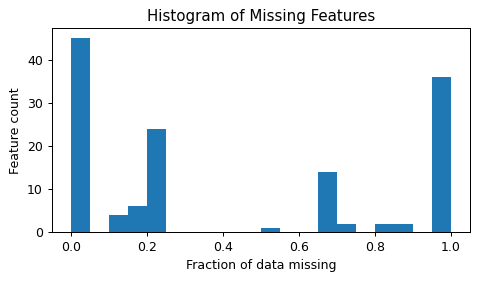

In [32]:
#Let's visualize the distribution of missing data percentages:
plt.figure(figsize=(6,3), dpi=90)
missing_features.plot.hist(bins=20)
plt.title('Histogram of Missing Features')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

From the above histogram, we see there's a large gap between features missing "some" data (<25%) and those missing "lots" of data (>40%).

Assuming that it will be very difficult to accurately impute data with more than 30% missing values, dropping such columns. Let's create a list of all columns missing more than 30% data in an alphabetical list:

In [33]:
drop_list9 = sorted(list(missing_features[missing_features > 0.3].index)) #creating list to store the column names with over 30% missing values
print(drop_list9)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', '

In [34]:
#number of features to be dropped?
len(drop_list9)

57

In [0]:
#Dropping these features
df.drop(drop_list9, axis=1, inplace=True)

In [36]:
print('Now we are left with {} columns'.format(df.shape[1]))
print('The remaining columns are as follows:')
print(df.columns)

Now we are left with 79 columns
The remaining columns are as follows:
Index(['loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan',
       'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_

That's great. We have considerably reduced the features from 136 to 79.

In [37]:
print(df['pymnt_plan'].unique())
print(df['pymnt_plan'].value_counts())

['n' 'y']
n    334232
y        30
Name: pymnt_plan, dtype: int64


In [0]:
#As there are mostly 'no' values and very few number of 'yes' values. Dropping it. 
drop_list10 = ['pymnt_plan']
df = df.drop(drop_list10,axis=1)

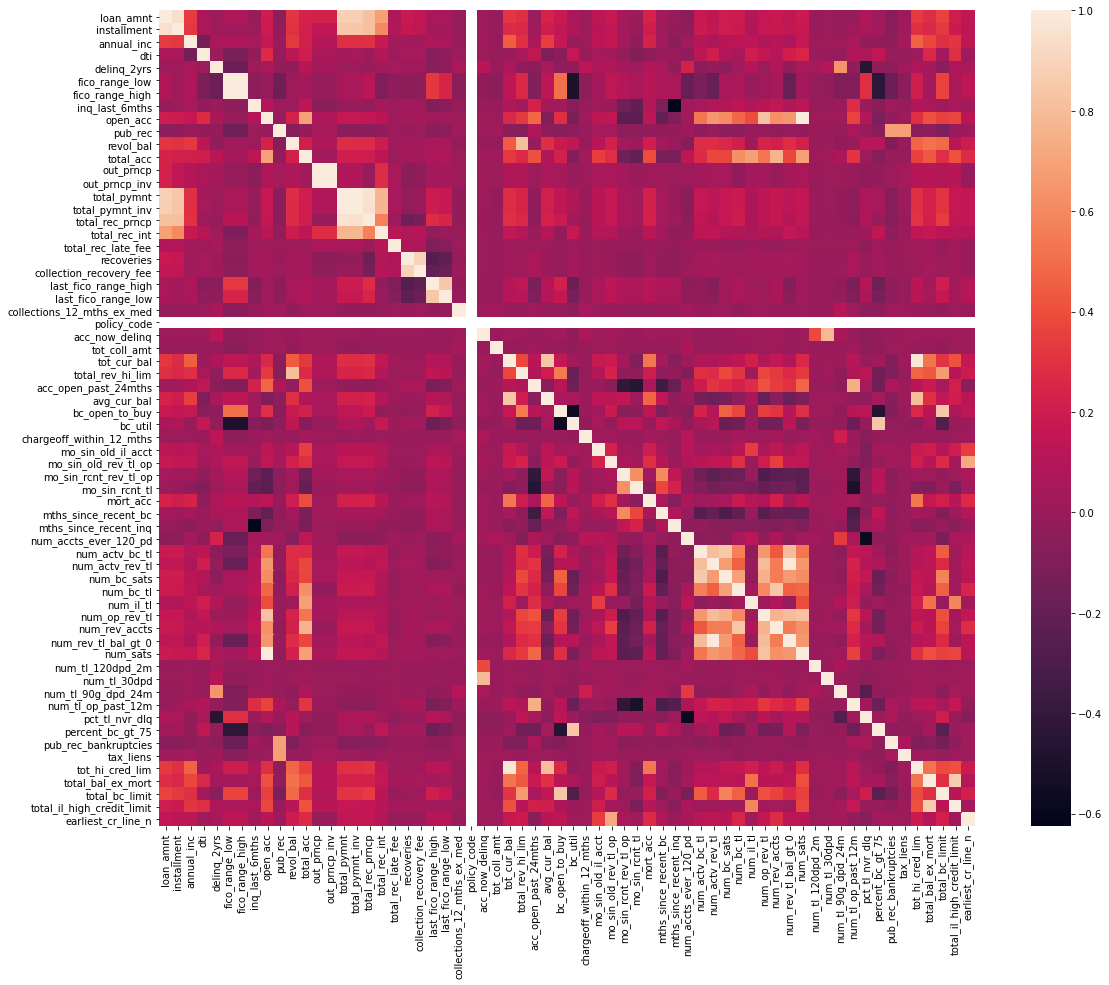

In [39]:
cor = df.corr() #Checking corelation between features
plt.subplots(figsize=(20,15)) #giving figure size parameters
sns.heatmap(cor, square = True) #plotting heatmap to check corelation

From the above heatmap we can observe that there is a high correlation between quite a few variables. For example:

- fico_range_high and fico_range_low
- last_fico_range_high and last_fico_range_low

Therefore, instead of keeping both. I am taking average of such values to eliminate one columns and reduce multicollinearity.

In [0]:
# calcualte mean fico score
df['fico_avg'] = (df['fico_range_high'] + df['fico_range_low'])/2
# calcualte mean last_fico score
df['last_fico_avf'] = (df['last_fico_range_high'] + df['last_fico_range_low'])/2
#Dropping the columns that are now transformed to new columns
drop_list11 = ['fico_range_high','last_fico_range_high','last_fico_range_low','last_fico_range_high']
df = df.drop(drop_list11,axis=1)

In [41]:
df.shape

(334262, 77)

In [0]:
#Opps. I missed one column. 
df = df.drop(['fico_range_low'],axis=1)

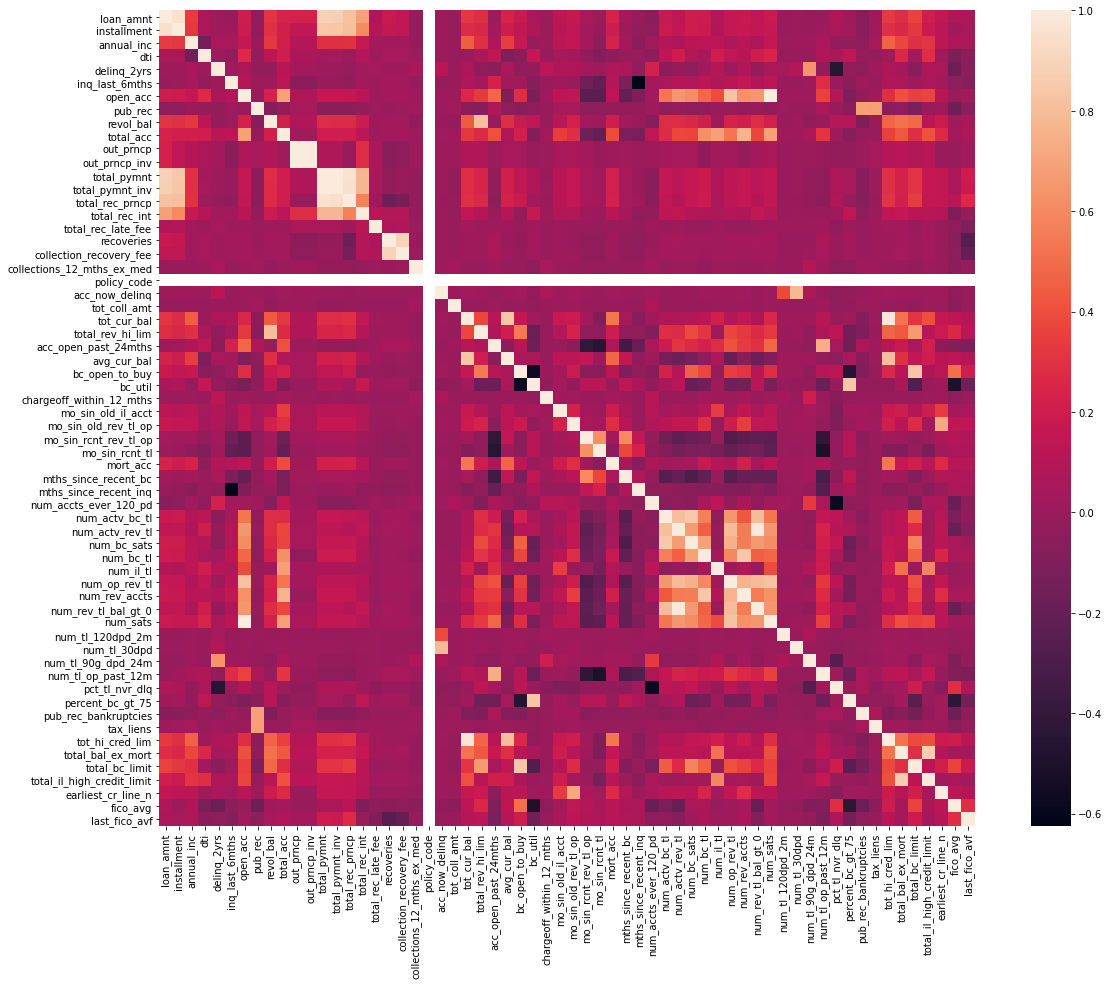

In [43]:
#### Rechecking correlation 
cor = df.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(cor, square = True)

#Seeing next 5 columns:

- inq_last_6mths:
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

- mths_since_last_delinq: 
The number of months since the borrower's last delinquency.

- open_acc:
The number of open credit lines in the borrower’s credit file.

- pub_rec: Number of derogatory public records

- revol_bal : Total credit revolving balance





In [44]:
df['open_acc'].head()

0     3.0
1     3.0
2     2.0
3    10.0
4    15.0
Name: open_acc, dtype: float64

Can't be very sure. But, by definition, all of these seems important. So, for now, I am letting it be. 


Let's proceed and contninue to improve financial jargon vocabulary even more. 

- revol_util	- 
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. In simpler terms, the credit card debt to limit ratio as a percentage. (seems important) (however, need further clearning)

- total_acc - The total number of credit lines currently in the borrower’s credit file (seems important)

- initial_list_status - The initial listing status of the loan. Possible values are – W, F (not able to find what W, F means) (Not sure) (need to see separately)

- out_prncp	: Remaining outstanding principal for total amount funded

- out_prncp_inv	: Remaining outstanding principal for portion of total amount funded by investors

- total_pymnt	: Payments received to date for total amount funded

- total_pymnt_inv	: Payments received to date for portion of total amount funded by investors

- total_rec_prncp	: Principal received to date

- total_rec_int	: Interest received to date

- total_rec_late_fee	: Late fees received to date

- recoveries	: post charge off gross recovery

- collection_recovery_fee	: post charge off collection fee

- last_pymnt_d : Last month payment was received

We need to drop the following columns as they contain information that will not be present while applying for a loan. Meaning, all of them contains data from the future which will not be present at the initial state for the unseen data (people applying for loan)

- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d

I'm using my best available knowledge after going through the dictionary and few google pages to determine which loan features are known to potential investors. I am not an investor, so my knowledge loan process is not too great.

In [45]:
drop_list12 = ['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
        'last_credit_pull_d']
df = df.drop(drop_list12,axis=1)
df.shape

(334262, 65)

In [0]:
drop_list11 = ['inq_last_6mths']
df = df.drop(drop_list11,axis=1)

- initial_list_status	: The initial listing status of the loan. Possible values are – W, F (not sure what W, F means)
- collections_12_mths_ex_med	: Number of collections in 12 months excluding medical collections (need to see further)
- policy_code	: publicly available policy_code=1\nnew products not publicly available policy_code=2
- application_type	: Indicates whether the loan is an individual application or a joint application with two co-borrowers
- acc_now_delinq : The number of accounts on which the borrower is now delinquent.


In [47]:
print(df['initial_list_status'].head(3))
print(df['initial_list_status'].unique())
print(df['initial_list_status'].count())

0    f
1    f
2    f
Name: initial_list_status, dtype: object
['f' 'w']
334262


initital_list_status: "The initial listing status of the loan. Possible values are – W, F." I'm not sure what this means.

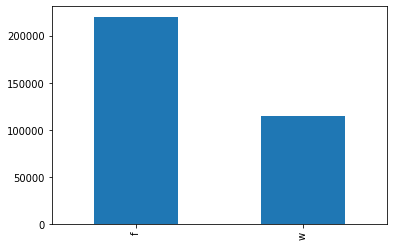

In [48]:
df['initial_list_status'].value_counts().plot.bar()
plt.show()

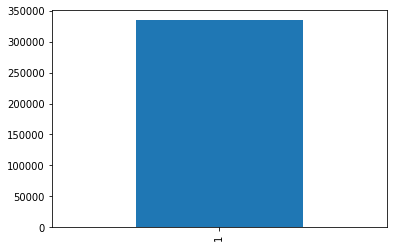

In [49]:
df['policy_code'].value_counts().plot.bar()
plt.show()

In [50]:
print(df.policy_code.value_counts())
print(df.initial_list_status.value_counts())

1    334262
Name: policy_code, dtype: int64
f    220101
w    114161
Name: initial_list_status, dtype: int64


The columns 'policy_code' has only one class and do not provide any information that would be useful in building a predictive model. Removing it!

In [51]:
drop_list13 =['policy_code']
df = df.drop(drop_list13,axis=1)
df.shape

(334262, 63)

In [52]:
df['collections_12_mths_ex_med'].value_counts()

0.0    331494
1.0      2449
2.0       147
3.0        13
4.0         6
5.0         4
7.0         1
6.0         1
8.0         1
9.0         1
Name: collections_12_mths_ex_med, dtype: int64

'collections_12_mths_ex_med' has almost all values as 0 and will therefore not be very useful for modeling. Removing it.

In [0]:
drop_list13 = ['collections_12_mths_ex_med']
df = df.drop(drop_list13,axis=1)

In [54]:
df['application_type'].value_counts()

Individual    330126
Joint App       4136
Name: application_type, dtype: int64

It has very few data points for joint application. So, Let's just compare the charge-off rates by application type:

In [55]:
df.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual    0.151051
Joint App     0.138781
Name: loan_status, dtype: float64

Joint loans are slightly less likely to be charged-off. So, it is important. Keeping it.

In [56]:
df['acc_now_delinq'].value_counts()

0.0    333138
1.0      1032
2.0        51
3.0         6
4.0         3
5.0         2
6.0         1
Name: acc_now_delinq, dtype: int64

In [57]:
df['acc_now_delinq'].isna().sum()

29

In [0]:
#Not many missing values and majority of the class contains 0. So, imputing with 0.
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(0)

- tot_coll_amt	: Total collection amounts ever owed (Seems important as how much was owed can definitely tell if a person is likely to default or not)
- tot_cur_bal	: Total current balance of all accounts (how much a person keeps in his account surely can be a predictor to tell if he will default or not) (Trust me on this, I have and obviously, I am close to nil almost all the time)

Below 4 are more or less related to open_acc (The number of open credit lines in the borrower's credit file).Therefore, removing them. 
- open_acc_6m :	Number of open trades in last 6 months
- open_il_12m	: Number of installment accounts opened in past 12 months
- open_il_24m	: Number of installment accounts opened in past 24 months
- open_act_il	: Number of currently active installment trades

In [59]:
print(df['tot_coll_amt'].value_counts())
print(df['tot_coll_amt'].describe())
print(df['tot_cur_bal'].value_counts())
print(df['tot_cur_bal'].describe())

0.0        231490
50.0          498
100.0         390
75.0          319
60.0          223
            ...  
5151.0          1
12638.0         1
10809.0         1
1912.0          1
4095.0          1
Name: tot_coll_amt, Length: 5010, dtype: int64
count    263986.000000
mean        154.674051
std        2162.366510
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      848438.000000
Name: tot_coll_amt, dtype: float64
0.0          44
22396.0      13
13721.0      11
19830.0      11
14163.0      11
             ..
3254633.0     1
50854.0       1
406833.0      1
406839.0      1
379567.0      1
Name: tot_cur_bal, Length: 170518, dtype: int64
count    2.639860e+05
mean     1.402929e+05
std      1.563619e+05
min      0.000000e+00
25%      2.842000e+04
50%      8.097800e+04
75%      2.107005e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64


In [0]:
#As majority of the class contains 0. So, imputing with 0.
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(0)

- mths_since_rcnt_il	: Months since most recent installment accounts opened
- total_bal_il :Total current balance of all installment accounts	 
- open_rv_12m	: Number of revolving trades opened in past 12 months
- open_rv_24m :	Number of revolving trades opened in past 24 months
- max_bal_bc : Maximum current balance owed on all revolving accounts	
- all_util : Balance to credit limit on all trades	
- total_rev_hi_lim : Total revolving high credit/credit limit	
- inq_fi : Number of personal finance inquiries	
- total_cu_tl : Number of finance trades

In [0]:
def check_stats(col): #creating function to check head of column, check it's statistics and do a value count
  print(df[col].head())
  print(df[col].describe())
  print(df[col].value_counts())

In [62]:
check_stats('total_rev_hi_lim')

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: total_rev_hi_lim, dtype: float64
count    2.639860e+05
mean     3.127535e+04
std      3.642529e+04
min      0.000000e+00
25%      1.400000e+04
50%      2.350000e+04
75%      3.870850e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64
15000.0     886
14500.0     885
9000.0      882
11500.0     868
10000.0     864
           ... 
25564.0       1
204500.0      1
25562.0       1
30856.0       1
46946.0       1
Name: total_rev_hi_lim, Length: 13784, dtype: int64


In [63]:
#From the dictionary, it is clear that this will not be avaiable at initial state
drop_list15 = ['total_rev_hi_lim']
df = df.drop(drop_list15,axis=1)
df.shape

(334262, 61)

- inq_last_12m : Number of credit inquiries in past 12 months (similar to inq_fi, therefore, removing)
- chargeoff_within_12_mths : Number of charge-offs within 12 months	

By definition, removign following as they don't seem much relevant for predictive modelling. 

- acc_open_past_24mths : Number of trades opened in past 24 months.
- avg_cur_bal	: Average current balance of all accounts
- bc_open_to_buy :	Total open to buy on revolving bankcards.
- bc_util	: Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- mo_sin_old_il_acct	: Months since oldest bank installment account opened
- mo_sin_old_rev_tl_op : Months since oldest revolving account opened	
- mo_sin_rcnt_rev_tl_op	: Months since most recent revolving account opened
- mo_sin_rcnt_tl : Months since most recent account opened


In [64]:
drop_list16 = ['acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl']
df = df.drop(drop_list16,axis=1)
df.shape

(334262, 53)

In [65]:
check_stats('chargeoff_within_12_mths')

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: chargeoff_within_12_mths, dtype: float64
count    334117.000000
mean          0.005612
std           0.085710
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: chargeoff_within_12_mths, dtype: float64
0.0    332456
1.0      1496
2.0       135
3.0        20
5.0         4
4.0         4
7.0         1
6.0         1
Name: chargeoff_within_12_mths, dtype: int64


In [0]:
#As dictionary suggests, this attribute will not be available for investors initially. 
#Also, 'chargeoff_within_12_mths' have almost all values as 0 and will therefore not be very useful for modeling. Removing it.
drop_list17 = ['chargeoff_within_12_mths']
df = df.drop(drop_list17,axis=1)

- mort_acc : Number of mortgage accounts.
- mths_since_recent_bc	: Months since most recent bankcard account opened.
- mths_since_recent_inq	: Months since most recent inquiry.
- num_accts_ever_120_pd	: Number of accounts ever 120 or more days past due
- num_actv_bc_tl : Number of currently active bankcard accounts
- num_actv_rev_tl	: Number of currently active revolving trades
- num_bc_sats	: Number of satisfactory bankcard accounts
- num_bc_tl	: Number of bankcard accounts
- num_il_tl	: Number of installment accounts
- num_op_rev_tl	: Number of open revolving accounts
- num_rev_accts	: Number of revolving accounts
- num_rev_tl_bal_gt_0	: Number of revolving trades with balance >0
- num_sats	: Number of satisfactory accounts
- num_tl_120dpd_2m	: Number of accounts currently 120 days past due (updated in past 2 months)
- num_tl_30dpd	: Number of accounts currently 30 days past due (updated in past 2 months)
- num_tl_90g_dpd_24m	: Number of accounts 90 or more days past due in last 24 months
- num_tl_op_past_12m : Number of accounts opened in past 12 months

In [67]:
new_list_to_check = ['mort_acc',	'mths_since_recent_inq',	'num_accts_ever_120_pd',	'num_actv_bc_tl',	'num_actv_rev_tl',	'num_bc_sats',	'num_bc_tl',	'num_il_tl',	'num_op_rev_tl',	'num_rev_accts',	'num_rev_tl_bal_gt_0',	'num_sats',	'num_tl_120dpd_2m',	'num_tl_30dpd',	'num_tl_90g_dpd_24m',	'num_tl_op_past_12m']
for col in new_list_to_check:
  print(check_stats(col))

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: mort_acc, dtype: float64
count    284232.000000
mean          1.698197
std           2.067894
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          61.000000
Name: mort_acc, dtype: float64
0.0     115787
1.0      49665
2.0      39534
3.0      29132
4.0      20373
5.0      13070
6.0       7690
7.0       4233
8.0       2222
9.0       1193
10.0       600
11.0       312
12.0       148
13.0        97
14.0        63
15.0        35
16.0        20
17.0        12
18.0        11
19.0        10
23.0         5
24.0         5
20.0         4
22.0         3
27.0         2
29.0         1
30.0         1
31.0         1
28.0         1
25.0         1
61.0         1
Name: mort_acc, dtype: int64
None
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: mths_since_recent_inq, dtype: float64
count    252180.000000
mean          6.945428
std           5.911776
min           0.000000
25%           2.000000
50%           5.

In [0]:
df["mort_acc"] = df["mort_acc"].fillna(0) #Imputing with zero as most number of people do not have a mortgage account
#Too many missing values, mostyly biased to one value and not that relevant of a feature. 
drop_list18 = ['mths_since_recent_bc','mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m']
df = df.drop(drop_list18,axis=1)

In [69]:
df.shape

(334262, 36)

Exploring Next 10 columns:
- pct_tl_nvr_dlq	: Percent of trades never delinquent

- percent_bc_gt_75	: Percentage of all bankcard accounts > 75% of limit.

- pub_rec_bankruptcies	: Number of public record bankruptcies (seems like important attribute)

- tax_liens	: Number of tax liens

- tot_hi_cred_lim	: Total high credit/credit limit

- total_bal_ex_mort	: Total credit balance excluding mortgage

- total_bc_limit	: Total bankcard high credit/credit limit

- total_il_high_credit_limit	: Total installment high credit/credit limit

- hardship_flag	: Flags whether or not the borrower is on a hardship plan

- debt_settlement_flag : Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.

In [0]:
list_next_10_till_debt_settlement = ['pct_tl_nvr_dlq','percent_bc_gt_75',	'pub_rec_bankruptcies',	'tax_liens',	'tot_hi_cred_lim',	'total_bal_ex_mort',	'total_bc_limit',	'total_il_high_credit_limit','hardship_flag',	'debt_settlement_flag']

In [71]:
for col in list_next_10_till_debt_settlement:
  print(check_stats(col))

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: pct_tl_nvr_dlq, dtype: float64
count    263833.000000
mean         94.574750
std           8.404424
min           0.000000
25%          92.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: pct_tl_nvr_dlq, dtype: float64
100.0    136624
96.0       7957
95.0       7876
90.0       5490
97.0       5359
          ...  
18.0          1
15.0          1
54.1          1
74.6          1
31.6          1
Name: pct_tl_nvr_dlq, Length: 508, dtype: int64
None
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: percent_bc_gt_75, dtype: float64
count    281351.000000
mean         49.559745
std          35.394278
min           0.000000
25%          20.000000
50%          50.000000
75%          80.000000
max         100.000000
Name: percent_bc_gt_75, dtype: float64
100.00    56270
0.00      54589
50.00     32987
66.70     21517
33.30     19084
          ...  
73.70         1
0.29          1
42.40         1
20.80         1
3.80       

In [0]:
# majority of the trades never delinquent (can been seen from mean). Therefore, removing pct_tl_nvr_dlq.
# Most of the values are missing and not that relevant of a feature. Therefore, removing them.
drop_list19 = ['pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','hardship_flag','debt_settlement_flag']
df = df.drop(drop_list19, axis=1) 

In [73]:
df.shape

(334262, 28)

In [0]:
# The column labeled 'tax_liens' have almost all values as 0 and will therefore not be very useful for modeling. Removing it.
drop_list20 = ['tax_liens']
df = df.drop(drop_list20,axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334262 entries, 0 to 334261
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             334262 non-null  int64  
 1   term                  334262 non-null  object 
 2   installment           334262 non-null  float64
 3   emp_length            318386 non-null  object 
 4   home_ownership        334262 non-null  object 
 5   annual_inc            334258 non-null  float64
 6   verification_status   334262 non-null  object 
 7   loan_status           334262 non-null  object 
 8   addr_state            334262 non-null  object 
 9   dti                   334234 non-null  float64
 10  delinq_2yrs           334233 non-null  float64
 11  open_acc              334233 non-null  float64
 12  pub_rec               334233 non-null  float64
 13  revol_bal             334262 non-null  int64  
 14  revol_util            333964 non-null  object 
 15  

Checking corelation again to see how far have we come.

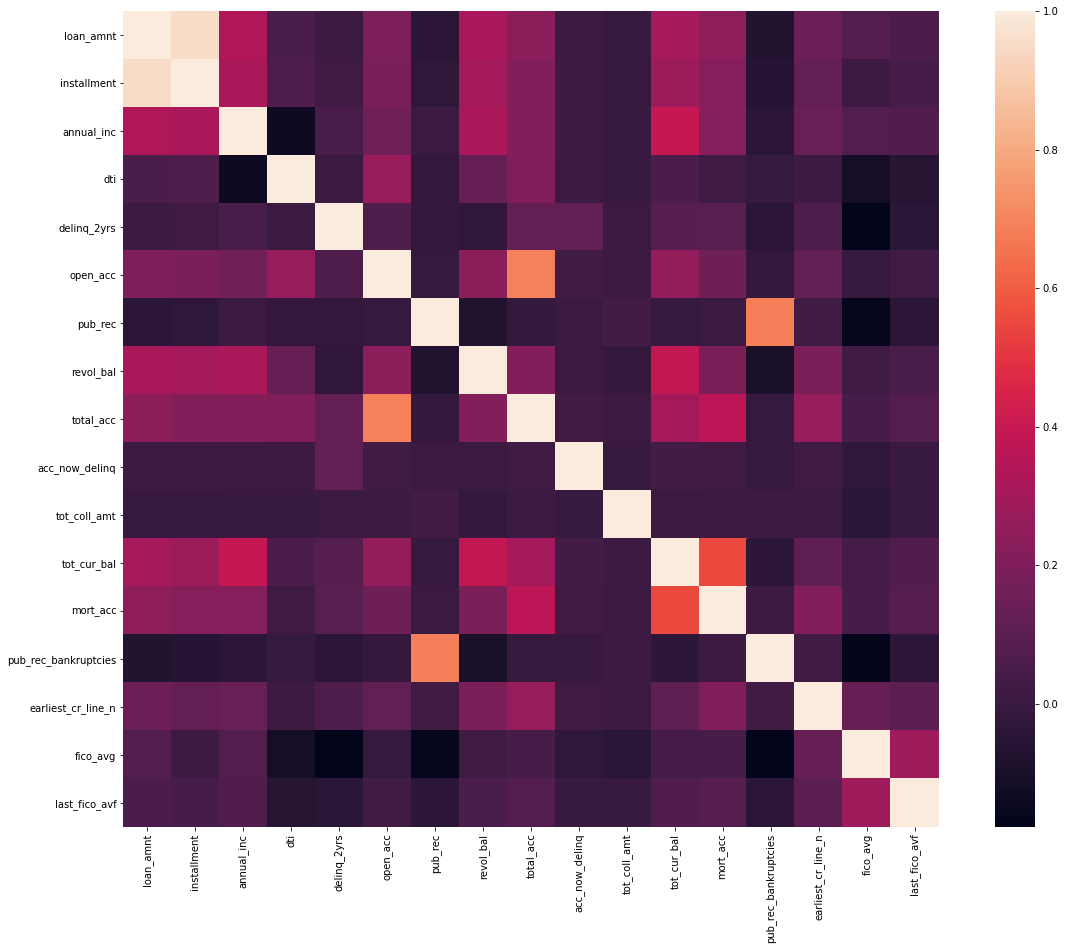

In [76]:
#import seaborn as sns
#from matplotlib import pyplot as plt
cor = df.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(cor, square = True)

We have reduced the number of features to 26. That's a long way from where we started. I am feeling good about it. Let's see if there are any more opportunities with our dataset.

In [77]:
# Missing values statistics
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 27 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
emp_length,15876,4.7
pub_rec_bankruptcies,1365,0.4
revol_util,298,0.1
delinq_2yrs,29,0.0
open_acc,29,0.0
pub_rec,29,0.0
total_acc,29,0.0
earliest_cr_line_n,29,0.0
dti,28,0.0
annual_inc,4,0.0


With this, I am done with data cleaning. FINALLY!

I’ve been able to reduce the number of columns from 150 to 26 without losing any meaningful data from our model. 

Data Cleaning Summary: 
- Dropped Data that must have been captured after the application form. This would have messed up our model. 

- Imputed missing values with either 0 or median

- Created new feature out of existing (taking average of FICO_low and FICO_high)


"Our goal here is to predict whether a person will be able to pay off a loan or  he/she will default.
We can see from data dictionary that loan_status is the only field that describes a loan status.

Therefore, we will be using it as target column."


# 4. Target Variable

In [78]:
#What are the value counts for this variable?
df['loan_status'].value_counts()

Fully Paid                                             242054
Charged Off                                             50440
Current                                                 36945
Does not meet the credit policy. Status:Fully Paid       1988
Late (31-120 days)                                       1206
Does not meet the credit policy. Status:Charged Off       761
In Grace Period                                           486
Late (16-30 days)                                         295
Default                                                    87
Name: loan_status, dtype: int64

In [79]:
type(df['loan_status'][0])

str

Currently, this column contains text values that need to be converted to numerical values to be eligible for training a model.

In [0]:
#Dependent Variable =  Loan_Status 

#Charged Off = 1
#Default = 1
#Late (31-120 days) = 1
#Does not meet credit policy. Status Charged Off = 1

#Current = 0
#Fully Paid = 0
#In Grace Period = 0
#Late (16-30 days) = 0
#Does not meet credit policy. Status Fully Paid = 0

In [0]:
loan_status_map = {
    'Charged Off': 1,
    'Default': 1,
    'Late (31-120 days)': 1,
    'Does not meet the credit policy. Status:Charged Off': 1,
    'Current': 0,
    'Fully Paid': 0,
    'In Grace Period': 0,
    'Late (16-30 days)': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0}

In [0]:
df['loan_status'] = df['loan_status'].map(loan_status_map)

Status counts as percentages:

In [83]:
df['loan_status'].value_counts(normalize=True, dropna=False)

0    0.842956
1    0.157044
Name: loan_status, dtype: float64

About 84% of the loans have been fully paid and 16% have charged off, so we can see that we are dealing with an imbalanced dataset. This means one result type is dominating the other one(s). In this case, we have a lot of "fully paid" records but not many records of other 6 (charged off) records. 

- 0: Fully Paid
- 1: Charged Off

In [84]:
df['loan_status'].value_counts(dropna=False)

0    281768
1     52494
Name: loan_status, dtype: int64

Visualizing the Target Column Outcomes

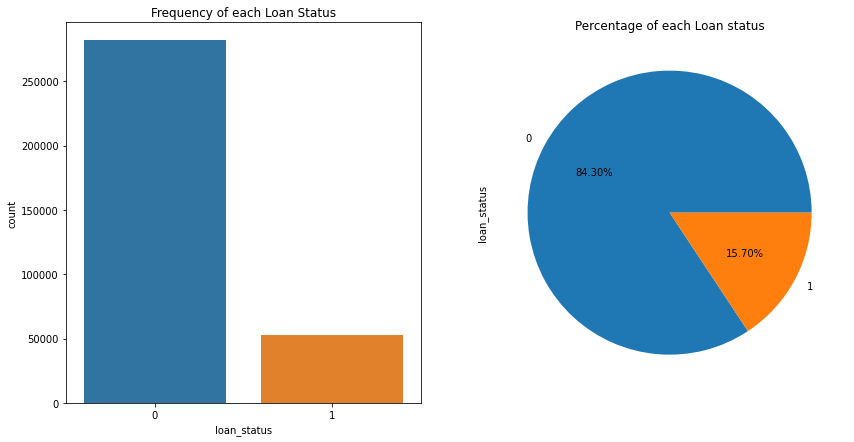

In [85]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

# 5. Further Pre-processing and Feature Engineering

We'll inspect each feature separately as it is not in readable range, and do the following:

- Drop the feature if it is not useful for predicting the Target variable.
- View summary statistics and visualize, plot against the Target variable.
- Modify the feature to make it useful for modeling, if necessary.
- We define a function for plotting a variable and comparing with the Target variable.

In [86]:
#Print the remaining predictor for future reference:
print(list(df.columns))

['loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'mort_acc', 'pub_rec_bankruptcies', 'purpose_n', 'earliest_cr_line_n', 'fico_avg', 'last_fico_avf']


## 5.1 loan_amnt

In [87]:
df['loan_amnt'].describe()

count    334262.000000
mean      13875.948283
std        8456.075067
min         500.000000
25%        7350.000000
50%       12000.000000
75%       19500.000000
max       40000.000000
Name: loan_amnt, dtype: float64

Loan amounts ranges from $500 to $40,000, with a median of $12,000.

In [88]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281768.0,13691.955084,8401.062603,500.0,7200.0,12000.0,19000.0,40000.0
1,52494.0,14863.554406,8679.125747,500.0,8000.0,13200.0,20000.0,40000.0


## 5.2 term

In [89]:
df['term'].value_counts(dropna=False)

 36 months    254366
 60 months     79896
Name: term, dtype: int64

In [0]:
df['term'] = df['term'].apply(lambda x: np.int8(x.split()[0]))

In [91]:
df['term'].value_counts(normalize=True)

36    0.760978
60    0.239022
Name: term, dtype: float64

In [92]:
#Compare the charge-off rate by loan period:
df.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,1]

term
36    0.131963
60    0.236895
Name: loan_status, dtype: float64

It is clear that loan with longer terms are more likely to charge off.

## 5.3 installment

In [93]:
df['installment'].describe()

count    334262.000000
mean        425.222429
std         253.955017
min           4.930000
25%         239.642500
50%         369.260000
75%         560.690000
max        1584.900000
Name: installment, dtype: float64

Installments range from \$4.93 to \$1,584, with a median of \$369.

In [94]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281768.0,420.446408,252.678644,4.93,235.36,364.96,554.33,1584.9
1,52494.0,450.858307,259.202186,15.91,264.04,397.33,588.42,1584.9


Charged-off loans have higher installments.

## 5.4 emp_length

In [95]:
df['emp_length'].head(3)

0    10+ years
1     < 1 year
2    10+ years
Name: emp_length, dtype: object

I'll be filling the null values (lesser than 1 year) with 0 assuming that the borrower hasn't worked many years and data is not recorded. Also, I'll be using regex to extract the number of years from all of the data.

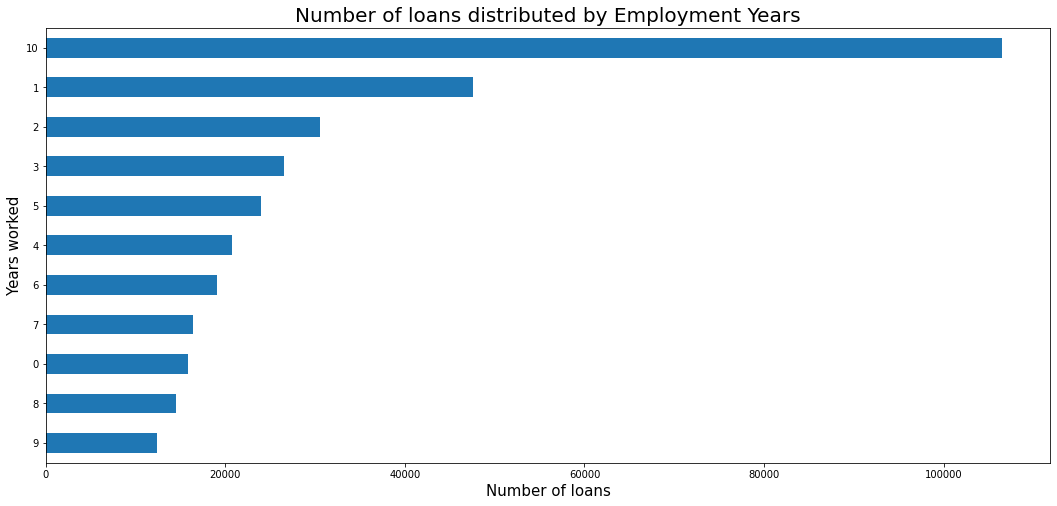

In [96]:
df['emp_length'].fillna(value=0,inplace=True) #filling the missing values with 0 
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True ) #checking not numeric value and then replacng it with '' to removing string
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8)) #plotting the bar to see the emp_length
plt.title('Number of loans distributed by Employment Years',fontsize=20) #plotting the title
plt.xlabel('Number of loans',fontsize=15) #plotting number of loans for x axis
plt.ylabel('Years worked',fontsize=15); #plotting years worked for y axis

The column looks fine. Also, it can be seen that people who have worked for 10 or more years are more likely to take a loan.

## 5.5 home_ownership

In [97]:
df['home_ownership'].value_counts(dropna=False)

MORTGAGE    166740
RENT        136303
OWN          30883
OTHER          182
ANY            104
NONE            50
Name: home_ownership, dtype: int64

In [0]:
#any and none are not very relevant for modeling. Therefore, clubbing them with Other. 
df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [99]:
df['home_ownership'].value_counts(dropna=False)

MORTGAGE    166740
RENT        136303
OWN          30883
OTHER          336
Name: home_ownership, dtype: int64

In [100]:
df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,1]

home_ownership
MORTGAGE    0.140896
OTHER       0.184524
OWN         0.161480
RENT        0.175726
Name: loan_status, dtype: float64

There is not much difference in terms of home ownership. However,people who rent and own a house have a higher chance of charge-off.

## 5.6 annual_inc

In [101]:
df['annual_inc'].describe()

count    3.342580e+05
mean     7.447377e+04
std      6.245915e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.324000e+04
75%      9.000000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64

Annual income ranges from \$0 to \$7,141,778, with a median of \$6.324000e+04. Because of the large range of incomes, we can take a log of annual income variable.

In [0]:
df['log_annual_inc'] = df['annual_inc'].apply(lambda x: np.log10(x+1))
df.drop('annual_inc', axis=1, inplace=True)

In [103]:
df['log_annual_inc'].describe()

count    334258.000000
mean          4.805127
std           0.235807
min           0.000000
25%           4.653222
50%           4.800999
75%           4.954247
max           6.853806
Name: log_annual_inc, dtype: float64

In [104]:
df.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281764.0,4.811506,0.236230,0.0,4.654379,4.812920,4.954247,6.853806
1,52494.0,4.770884,0.230533,0.0,4.623260,4.778158,4.903095,6.747330


Obviously, people with higher income are more likely to pay off their loans.

## 5.7 verification_status

In [105]:
df['verification_status'].value_counts()

Verified           131804
Not Verified       107818
Source Verified     94640
Name: verification_status, dtype: int64

## 5.8 addr_state

In [106]:
df['addr_state'].unique() #seeing the unique values of address state column

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object)

In [0]:
# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID'] #all western states
south_west = ['AZ', 'TX', 'NM', 'OK'] #all south western states
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ] #all south eastern states
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND'] #all mid western states
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME'] #all north eastern states

In [0]:
df['region'] = np.nan #creating new column region with all nan values
def finding_regions(state): #creating fuction to recode states into region
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    
df['region'] = df['addr_state'].apply(finding_regions) #apply function to the new column

In [109]:
#Calculate the charge-off rates by region:
df.groupby('region')['loan_status'].value_counts(normalize=True).loc[:,1].sort_values()

region
SouthWest    0.152141
West         0.152801
MidWest      0.153492
NorthEast    0.158823
SouthEast    0.164648
Name: loan_status, dtype: float64

It is almost similar by region. Let's see the same by state:

In [110]:
#Calculate the charge-off rates by state:
df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,1].sort_values()

addr_state
ME    0.082237
DC    0.096362
WV    0.116258
NH    0.118514
WY    0.118954
VT    0.123103
CO    0.126932
MT    0.127706
SC    0.130946
OR    0.133691
KS    0.134059
AK    0.136580
IL    0.139573
CT    0.141126
RI    0.141319
MA    0.144735
DE    0.145494
WA    0.145745
TX    0.146376
UT    0.149084
WI    0.149089
ID    0.150538
ND    0.151261
GA    0.151279
MN    0.151411
OH    0.156154
CA    0.156611
PA    0.156890
AZ    0.158704
VA    0.160294
NM    0.162592
MD    0.162911
KY    0.163037
SD    0.163235
MO    0.163243
NC    0.164564
MI    0.165060
NY    0.165518
HI    0.167688
NJ    0.169801
LA    0.171275
NE    0.171846
IN    0.172364
AR    0.173739
TN    0.174778
AL    0.177056
FL    0.177601
OK    0.180272
NV    0.185714
MS    0.192806
IA    0.230769
Name: loan_status, dtype: float64

The payment plan column (pymnt_plan) has two unique values, 'y' and 'n', with 'y' occurring only 30 times compared to 334232. Let’s drop this column.

## 5.9 dti

In [111]:
df['dti'].describe()

count    334234.000000
mean          0.001712
std           0.000909
min           0.000000
25%           0.001121
50%           0.001677
75%           0.002265
max           0.099900
Name: dti, dtype: float64

Text(0.5, 1.0, 'Debt-to-income Ratio')

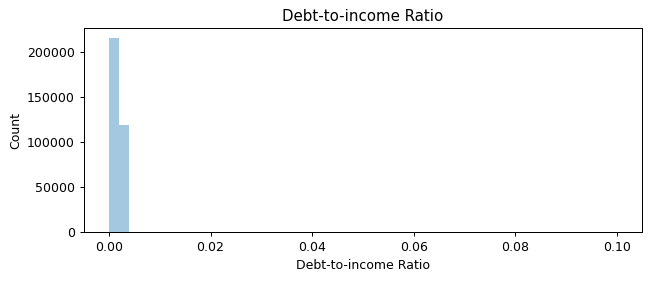

In [112]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(df.loc[df['dti'].notnull() & (df['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [113]:
df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281744.0,0.001686,0.000845,0.0,0.001098,0.001647,0.002237,0.0999
1,52490.0,0.001849,0.001188,0.0,0.001262,0.001836,0.002408,0.0999


## 5.10 delinq_2yrs :
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [114]:
df.groupby('loan_status')['delinq_2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281742.0,0.264259,0.767969,0.0,0.0,0.0,0.0,29.0
1,52491.0,0.283058,0.811875,0.0,0.0,0.0,0.0,18.0


It does not tell us much as mean values for both status are same. Also, it is showing contradictory results that people who have more 30+ days past due incidences are more likely to fully pay the loan. Therefore, dropping it.

In [0]:
df = df.drop(['delinq_2yrs'],axis=1)

In [116]:
df.columns

Index(['loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'addr_state', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'mort_acc', 'pub_rec_bankruptcies',
       'purpose_n', 'earliest_cr_line_n', 'fico_avg', 'last_fico_avf',
       'log_annual_inc', 'region'],
      dtype='object')

## 5.11 open_acc

Text(0.5, 1.0, 'Number of Open Credit Lines')

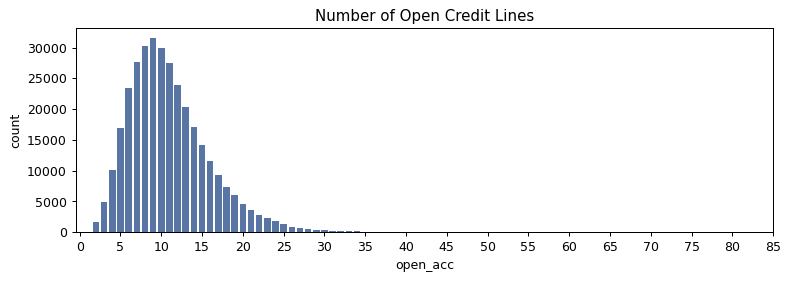

In [117]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(df['open_acc'], order=sorted(df['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

In [118]:
#let's see the difference in number of credit lines between fully paid loans and charged-off loans
df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281742.0,10.987907,5.025241,0.0,7.0,10.0,14.0,97.0
1,52491.0,11.163647,5.088256,0.0,8.0,10.0,14.0,64.0


not much difference

## 5.12 pub_rec

In [119]:
df['pub_rec'].value_counts().sort_index()

0.0     293303
1.0      35205
2.0       3805
3.0       1093
4.0        431
5.0        180
6.0         97
7.0         48
8.0         28
9.0         10
10.0        10
11.0         8
12.0         2
13.0         5
14.0         2
16.0         1
17.0         1
19.0         1
24.0         1
49.0         1
54.0         1
Name: pub_rec, dtype: int64

let's see the difference in average public records between fully paid loans and charged-off loans

In [120]:
df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281742.0,0.147479,0.499325,0.0,0.0,0.0,0.0,54.0
1,52491.0,0.169229,0.488382,0.0,0.0,0.0,0.0,13.0


Not much difference

## 5.13 revol_bal

In [121]:
df['revol_bal'].describe()

count    3.342620e+05
mean     1.607664e+04
std      2.075735e+04
min      0.000000e+00
25%      6.302000e+03
50%      1.153800e+04
75%      1.993000e+04
max      2.568995e+06
Name: revol_bal, dtype: float64

In [0]:
#doing log transform
df['revol_bal'] = df['revol_bal'].apply(lambda x: np.log10(x+1))

In [123]:
df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281768.0,3.998152,0.548212,0.0,3.798582,4.062206,4.302461,6.409763
1,52494.0,3.992769,0.532393,0.0,3.805790,4.061923,4.283861,6.242223


not much different in means

## 5.14 revol_util

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [124]:
df['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [0]:
#We see that term, emp_length, revol_util columns contains numeric values, but is formatted as object. 
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') #stripping the % symbol and converting the type to "Float"

In [126]:
df['revol_util'].describe()

count    333964.000000
mean         54.726757
std          24.461582
min           0.000000
25%          36.900000
50%          56.200000
75%          74.100000
max         162.000000
Name: revol_util, dtype: float64

In [127]:
df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281523.0,54.114541,24.562150,0.0,36.1,55.5,73.6,140.4
1,52441.0,58.013363,23.645265,0.0,41.3,59.9,76.7,162.0


People with higher Revolving line utilization rate are more likely to charge off

## 5.15 total_acc

Text(0.5, 1.0, 'Total Number of Credit Lines')

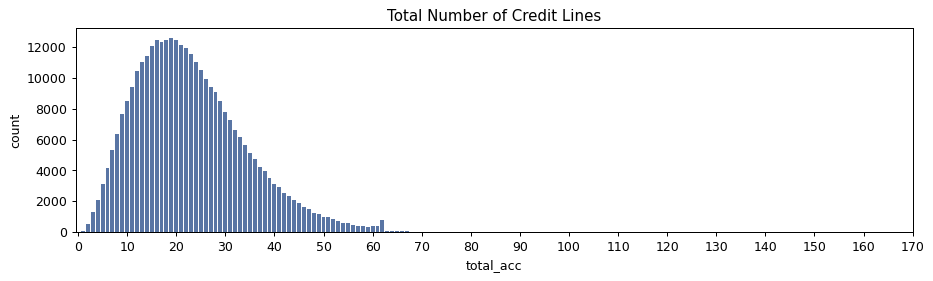

In [128]:
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(df['total_acc'], order=sorted(df['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [129]:
df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281742.0,24.116557,11.431599,1.0,16.0,23.0,31.0,137.0
1,52491.0,23.769522,11.430236,1.0,15.0,22.0,30.0,95.0


People with higher number of credit lines are more likely to fully pay.

## 5.16 initial_list_status

In [0]:
#not really sure what W, F means here. 

## 5.17 application_type

In [131]:
df['application_type'].value_counts()

Individual    330126
Joint App       4136
Name: application_type, dtype: int64

In [132]:
df.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,1]

application_type
Individual    0.157055
Joint App     0.156190
Name: loan_status, dtype: float64

Not much difference. dropping this too. Individual are more likely to charge off but there are more individuals in dataset then joint applications

## 5.18 acc_now_delinq

In [133]:
df['acc_now_delinq'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: acc_now_delinq, dtype: float64

In [134]:
df['acc_now_delinq'].value_counts()

0.0    333167
1.0      1032
2.0        51
3.0         6
4.0         3
5.0         2
6.0         1
Name: acc_now_delinq, dtype: int64

In [135]:
df.groupby('acc_now_delinq')['loan_status'].value_counts(normalize=True).loc[:,1]

acc_now_delinq
0.0    0.157017
1.0    0.164729
2.0    0.117647
3.0    0.666667
5.0    0.500000
Name: loan_status, dtype: float64

Too many 0 values and apart from that, outliers are present too. Therefore, dropping.

In [0]:
df = df.drop(['application_type','acc_now_delinq'],axis=1)

## 5.19 tot_coll_amt

In [137]:
df['tot_coll_amt'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: tot_coll_amt, dtype: float64

In [138]:
df['tot_coll_amt'].value_counts()

0.0        301766
50.0          498
100.0         390
75.0          319
60.0          223
            ...  
5151.0          1
12638.0         1
10809.0         1
1912.0          1
4095.0          1
Name: tot_coll_amt, Length: 5010, dtype: int64

## 5.20 tot_cur_bal

In [139]:
df['tot_cur_bal'].value_counts()

0.0          70320
22396.0         13
13721.0         11
19830.0         11
14163.0         11
             ...  
3254633.0        1
50854.0          1
406833.0         1
406839.0         1
379567.0         1
Name: tot_cur_bal, Length: 170518, dtype: int64

## 5.21 mort_acc

In [140]:
df['mort_acc'].describe()

count    334262.000000
mean          1.444023
std           2.000797
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          61.000000
Name: mort_acc, dtype: float64

Somebody has 61 mortgage accounts. This could be an outlier or may be some one can.

In [141]:
df['mort_acc'].value_counts().head(10)

0.0    165817
1.0     49665
2.0     39534
3.0     29132
4.0     20373
5.0     13070
6.0      7690
7.0      4233
8.0      2222
9.0      1193
Name: mort_acc, dtype: int64

In [142]:
#comparing statistics by target variable:
df.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281768.0,1.480487,2.023410,0.0,0.0,1.0,2.0,61.0
1,52494.0,1.248295,1.862625,0.0,0.0,0.0,2.0,27.0


People who pay off their loans have several mortgage accounts.

## 5.22 pub_rec_bankruptcies

In [143]:
df['pub_rec_bankruptcies'].value_counts().sort_index()

0.0    301317
1.0     30255
2.0      1036
3.0       203
4.0        56
5.0        20
6.0         5
7.0         3
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [144]:
#comparing statistics by target variable:
df.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,280737.0,0.097419,0.319205,0.0,0.0,0.0,0.0,8.0
1,52160.0,0.114609,0.342620,0.0,0.0,0.0,0.0,7.0


People with more bankruptcy records are more likely to charge off. No wonder here!

## 5.23 purpose_n

In [145]:
df['purpose_n'].unique()

array(['debt', 'major_purchases', 'life_events', 'other'], dtype=object)

## 5.24 earliest_cr_line_n

In [150]:
df['earliest_cr_line_n'].head()

0    35.337440
1    21.092402
2    18.505133
3    24.254620
4    24.339493
Name: earliest_cr_line_n, dtype: float64

In [151]:
df['earliest_cr_line_n'].describe()

count    334233.000000
mean         21.760762
std           7.832563
min         -48.577687
25%          16.843258
50%          20.673511
75%          25.590691
max          51.337440
Name: earliest_cr_line_n, dtype: float64

In [152]:
#comparing statistics by target variable:
df.groupby('loan_status')['earliest_cr_line_n'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281742.0,21.877040,7.800313,-48.577687,16.925394,20.758385,25.757700,51.33744
1,52491.0,21.136648,7.974597,-48.410678,16.424367,20.175222,24.843258,51.33744


## 5.25 fico_avg

In [153]:
df.groupby('loan_status')['fico_avg'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281768.0,701.917961,32.353838,612.0,677.0,697.0,717.0,847.5
1,52494.0,692.074028,26.252609,617.0,672.0,687.0,707.0,847.5


Loans that charge off have a FICO score 9 points lesser on mean.

## 5.26 last_fico_avf

Last fico score is not applicable for modeling because it is not available at start of application

In [0]:
df = df.drop(['last_fico_avf'],axis=1)

## 5.27 log_annual_inc

In [155]:
df['log_annual_inc'].describe()

count    334258.000000
mean          4.805127
std           0.235807
min           0.000000
25%           4.653222
50%           4.800999
75%           4.954247
max           6.853806
Name: log_annual_inc, dtype: float64

In [156]:
df.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,281764.0,4.811506,0.236230,0.0,4.654379,4.812920,4.954247,6.853806
1,52494.0,4.770884,0.230533,0.0,4.623260,4.778158,4.903095,6.747330


There is slight difference in mean which suggests people with better income are more likely to pay

## 5.28 region

In [0]:
df = df.drop(['region'],axis=1)

In [0]:
#'installment' is rejected as I chose to keep term value and it has colinearity too
df = df.drop(['installment'],axis=1)

In [160]:
df.columns

Index(['loan_amnt', 'term', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'addr_state', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'tot_coll_amt', 'tot_cur_bal', 'mort_acc',
       'pub_rec_bankruptcies', 'purpose_n', 'earliest_cr_line_n', 'fico_avg',
       'log_annual_inc'],
      dtype='object')

## 5.29 Dealing with Remaining missing values: Data imputation

To deal with missing values in each column, I will do some data imputation dealing with each dtype differently. For dtype = object, I will use the most frequent values while for numerical dtypes, I will use the median

In [0]:
obj_cols = df.columns[df.dtypes==object]

#Imputer function
imputer = lambda x:x.fillna(x.value_counts().index[0]) 

#Impute dtype=object with most frequent value
df[obj_cols] = df[obj_cols].apply(imputer) 

#Impute the rest of df with median
df = df.fillna(df.median(axis=0)) 

In [162]:
missing_fractions = df.isnull().mean().sort_values(ascending=False) # Fraction of data missing for each variable
print(missing_fractions[missing_fractions > 0]) # Print variables that are missing data

Series([], dtype: float64)


In [0]:
df.fillna(df.median(), inplace=True)

In [164]:
df.head(1)

,loan_amnt,term,emp_length,home_ownership,verification_status,loan_status,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,tot_coll_amt,tot_cur_bal,mort_acc,pub_rec_bankruptcies,purpose_n,earliest_cr_line_n,fico_avg,log_annual_inc
0,5000,36,10,RENT,Verified,0,AZ,0.002765,3.0,0.0,4.135101,83.7,9.0,f,0.0,0.0,0.0,0.0,debt,35.33744,737.0,4.380229


In [165]:
corr = df.corr()['loan_status'].sort_values()
# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 revol_bal              -0.003588
tot_coll_amt           -0.001019
open_acc                0.012700
pub_rec                 0.015904
pub_rec_bankruptcies    0.018977
loan_amnt               0.050411
revol_util              0.057963
dti                     0.065217
term                    0.122998
loan_status             1.000000
Name: loan_status, dtype: float64

Most Negative Correlations:
 fico_avg             -0.113067
log_annual_inc       -0.062679
tot_cur_bal          -0.046372
mort_acc             -0.042224
earliest_cr_line_n   -0.034391
total_acc            -0.011042
revol_bal            -0.003588
tot_coll_amt         -0.001019
open_acc              0.012700
pub_rec               0.015904
Name: loan_status, dtype: float64


# 6 Processing Categorical Variables

Here’s an outline of what we’ll be doing in this stage:

- Investigate Categorical Columns
- Convert Categorical Columns To Numeric Features
- Map Ordinal Values To Integers
- Encode Nominal Values As Dummy *Variables*

In [166]:
#how many variable we have now
print(df.shape)
df.head(1)

(334262, 22)


,loan_amnt,term,emp_length,home_ownership,verification_status,loan_status,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,tot_coll_amt,tot_cur_bal,mort_acc,pub_rec_bankruptcies,purpose_n,earliest_cr_line_n,fico_avg,log_annual_inc
0,5000,36,10,RENT,Verified,0,AZ,0.002765,3.0,0.0,4.135101,83.7,9.0,f,0.0,0.0,0.0,0.0,debt,35.33744,737.0,4.380229


In [167]:
null_counts = df.isnull().sum().sort_index()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
addr_state              0
dti                     0
earliest_cr_line_n      0
emp_length              0
fico_avg                0
home_ownership          0
initial_list_status     0
loan_amnt               0
loan_status             0
log_annual_inc          0
mort_acc                0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose_n               0
revol_bal               0
revol_util              0
term                    0
tot_coll_amt            0
tot_cur_bal             0
total_acc               0
verification_status     0
dtype: int64


In [168]:
print("Data types and their frequency\n{}".format(df.dtypes.value_counts()))

Data types and their frequency
float64    13
object      6
int64       3
dtype: int64


We still have 6 object columns that contain text which need to be converted into numeric features. 

Let’s select just the object columns using the DataFrame method select_dtype, then display a sample row to get a better sense of how the values in each column are formatted.

In [0]:
categorical = ['home_ownership','purpose_n','emp_length']

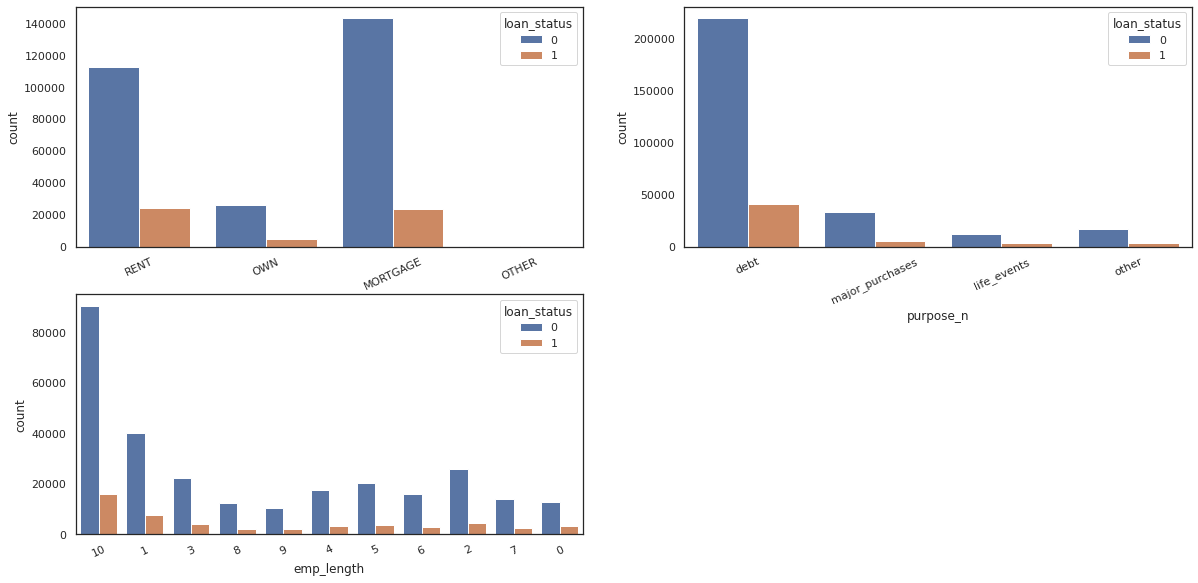

In [179]:
sns.set_style("white")
fig = plt.figure(figsize = (20,15))
axes = 320
for i in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data =df , x = i, hue='loan_status')
    plt.xticks(rotation=25)
plt.show()

Customers who has Mortgages are taking most loan amounts which causes them to default.

Most of the customers are taking up loans to settle debts. 

Default percentage is high in the customers who are having less than 5 years of work experience. 

Text(0.5, 1.0, 'Loan Amount by home_ownership')

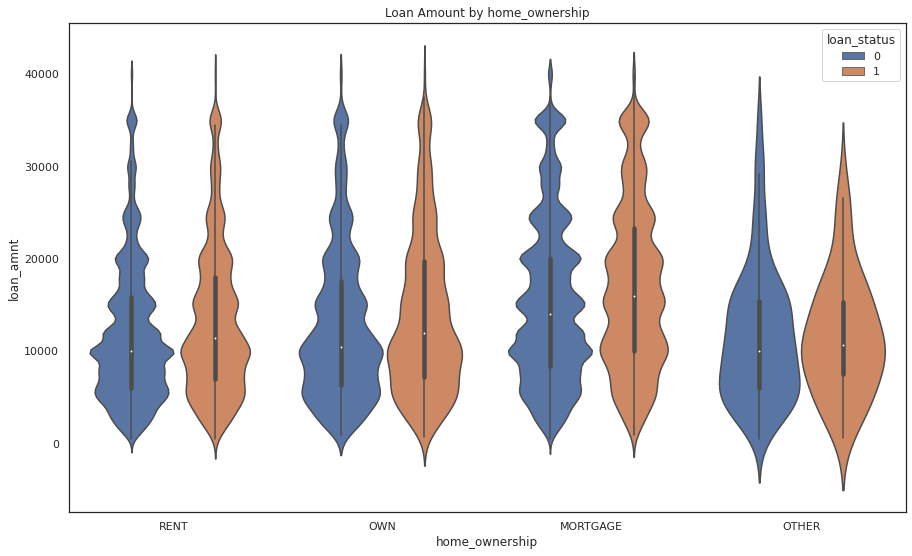

In [181]:
fig, ax1=plt.subplots()
fig.set_size_inches(15,9)

ax1 = sns.violinplot(x=df['home_ownership'], y=df['loan_amnt'],data=df, hue=df['loan_status'])
ax1.set(xlabel ='home_ownership', ylabel='loan_amnt')
ax1.set_title('Loan Amount by home_ownership')

#RENT, OWN, MORTAGAGE has high distributed values, However the others do not have much variation. 

RENT, OWN, MORTAGAGE has high distributed values, However the others do not have much variation. 

In [182]:
object_columns_df = df.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

emp_length                   10
home_ownership             RENT
verification_status    Verified
addr_state                   AZ
initial_list_status           f
purpose_n                  debt
Name: 0, dtype: object


Columns with categorical values:

- emp_length - number of years the borrower was employed upon time of application.
- home_ownership - home ownership status, can only be 1 of 4 categorical values according to the data dictionary.
- verification_status - indicates if income was verified by LendingClub.
- addr_state - states
- initial_list_status - Initial listing status (W,F)
- purpose_n - a category provided by the borrower for the loan request.

In [183]:
cols = ['emp_length','home_ownership','verification_status','addr_state', 'purpose_n', 'initial_list_status']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

emp_length :
10    106549
1      47613
2      30541
3      26575
5      24020
4      20745
6      19079
7      16432
0      15876
8      14495
9      12337
Name: emp_length, dtype: int64 

home_ownership :
MORTGAGE    166740
RENT        136303
OWN          30883
OTHER          336
Name: home_ownership, dtype: int64 

verification_status :
Verified           131804
Not Verified       107818
Source Verified     94640
Name: verification_status, dtype: int64 

addr_state :
CA    51778
NY    28589
TX    26350
FL    23733
IL    13269
NJ    12921
PA    11677
GA    10788
OH    10765
VA     9938
NC     9115
MI     8197
MA     8139
MD     7900
AZ     7744
WA     7273
CO     6988
MN     5812
MO     5403
CT     5364
NV     4830
IN     4183
WI     4172
AL     4123
OR     4099
SC     3910
LA     3906
TN     3822
KY     3122
OK     2940
KS     2939
AR     2498
UT     2455
HI     1795
NM     1759
NH     1561
RI     1486
WV     1101
DC     1017
MT      924
DE      921
AK      842
WY      765
MS      69

In [0]:
#Further, dropping 'state' columns before modeling 
df.drop(['addr_state'], axis = 1, inplace= True) 

In [0]:
#converting the type of emp_length column to int64 from string
df['emp_length'] = df['emp_length'].astype('int64') 

In [186]:
object_columns_df = df.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

home_ownership             RENT
verification_status    Verified
initial_list_status           f
purpose_n                  debt
Name: 0, dtype: object


#### Convert Categorical Columns to Numeric Features

Ordinal values: these categorical values are in natural order. We can sort or order them either in increasing or decreasing order. 
- For example: S < M < L

Nominal Values: these are regular categorical values. We can’t order nominal values. For instance, while we can order loan applicants in the employment length column (emp_length) based on years spent in the workforce:
- year 1 < year 2 < year 3 … < year N,

we can’t do that with the column purpose. It wouldn’t make sense to say:

- car < wedding < education < moving < house

These are the columns we now have in our dataset:

Ordinal Values
emp_length
Nominal Values _ home_ownership
verification_status
purpose_n
term

If any categorical variables have missing values, we'll need to create NaN dummy variables for those. So first check which variables have missing data:



In [187]:
missing_fractions = df.isnull().mean().sort_values(ascending=False) # Fraction of data missing for each variable
print(missing_fractions[missing_fractions > 0]) # Print variables that are missing data

Series([], dtype: float64)


There are no categorical variables with missing values, and therefore we don't need any NaN dummy variables.

In [0]:
#Converting nominal features into numerical features requires encoding them as dummy variables.
nominal_columns = ["home_ownership", "verification_status", "purpose_n", "initial_list_status"]
dummy_df = pd.get_dummies(df[nominal_columns], drop_first=True) #greating dummies for the above nominal columns and removing first dummy variable to 
#drop the first one to avoid linear dependency between the resulted features since some algorithms may struggle with this issue.
df = pd.concat([df, dummy_df], axis=1) #merging the newly created dummy columns with the working dataset
df = df.drop(nominal_columns, axis=1) #dropping the original nominal columns as they are not required anymore

In [190]:
df.shape

(334262, 26)

In [191]:
df.sample(5)

,loan_amnt,term,emp_length,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,mort_acc,pub_rec_bankruptcies,earliest_cr_line_n,fico_avg,log_annual_inc,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_n_life_events,purpose_n_major_purchases,purpose_n_other,initial_list_status_w
207653,9600,36,2,1,0.002082,7.0,0.0,3.988113,80.5,9.0,0.0,0.0,0.0,0.0,13.672827,672.0,4.602071,0,0,1,0,0,0,0,0,0
212338,5000,36,7,0,0.002981,19.0,1.0,3.594393,81.0,29.0,0.0,0.0,1.0,1.0,23.422313,672.0,4.653222,0,0,0,0,1,0,0,0,0
8156,8000,36,6,0,0.000267,6.0,0.0,3.507181,74.7,12.0,0.0,0.0,0.0,0.0,15.252567,672.0,4.720168,0,0,0,0,1,0,0,0,0
21040,8000,36,2,0,0.001132,7.0,0.0,3.679519,55.6,19.0,0.0,0.0,0.0,0.0,22.672142,722.0,4.643463,0,0,0,0,1,0,0,0,0
106150,28500,60,10,1,0.002580,11.0,0.0,4.315991,75.0,30.0,85.0,100762.0,1.0,0.0,32.925394,682.0,4.845104,0,0,0,0,1,0,0,0,0


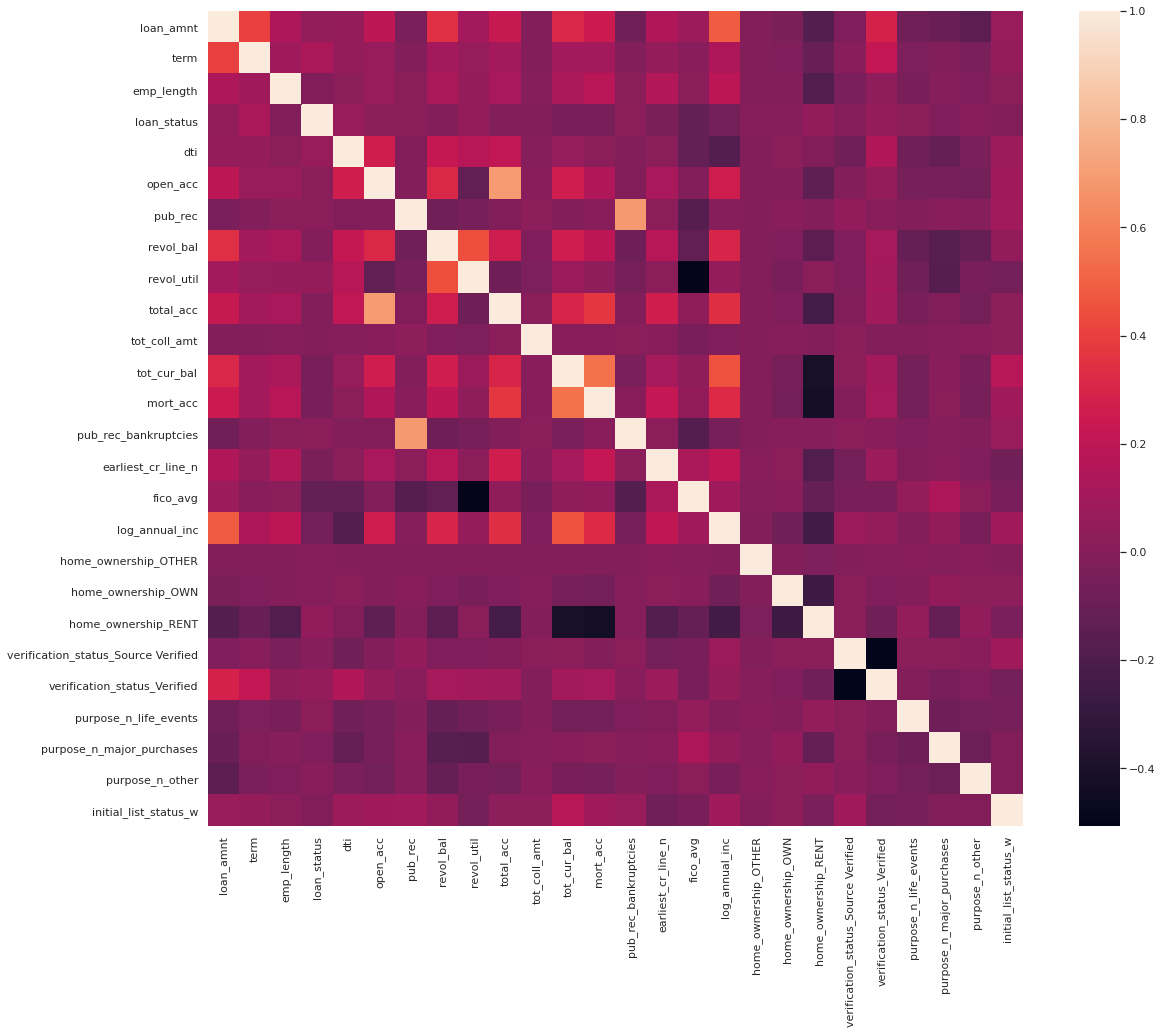

In [192]:
#Checking corelation for the last time before modeling
cor = df.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(cor, square = True)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334262 entries, 0 to 334261
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            334262 non-null  int64  
 1   term                                 334262 non-null  int64  
 2   emp_length                           334262 non-null  int64  
 3   loan_status                          334262 non-null  int64  
 4   dti                                  334262 non-null  float64
 5   open_acc                             334262 non-null  float64
 6   pub_rec                              334262 non-null  float64
 7   revol_bal                            334262 non-null  float64
 8   revol_util                           334262 non-null  float64
 9   total_acc                            334262 non-null  float64
 10  tot_coll_amt                         334262 non-null  float64
 11  tot_cur_bal  

# 7.0 Saving and Downloading Cleaned File

In [196]:
from google.colab import files
df.to_csv('/content/drive/My Drive/Lending_Club/loan_EDA_Cleaned.csv') 
files.download('/content/drive/My Drive/Lending_Club/loan_EDA_Cleaned.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 47556, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

# 8.0 Final DataFrame & Pickling

In [0]:
#Using 'pickle' feature to save the dataframe created and use it in a distributed environment for modeling.(different workbooks) 
import pickle

df.to_pickle("/content/drive/My Drive/Lending_Club/data_selected.pkl")

#df = pd.read_pickle("/content/drive/My Drive/Lending_Club/data_selected.pkl")

Reference: Saving : https://stackoverflow.com/questions/53898836/export-dataframe-as-csv-file-from-google-colab-to-google-drive/53900737